In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Linear Regression

### Prepare data

We start by using linear regression on a simple 1D problem. Our task is to predict the output, y, given the input X.

In [132]:
X = np.arange(0, 10, 0.3)
y = 1.5*X + np.random.normal(0, 1.5, size=X.shape)
pd.DataFrame({'X':X, 'y':y}).head()

,X,y
0,0.0,0.563011
1,0.3,1.359653
2,0.6,0.774827
3,0.9,0.769783
4,1.2,2.010509


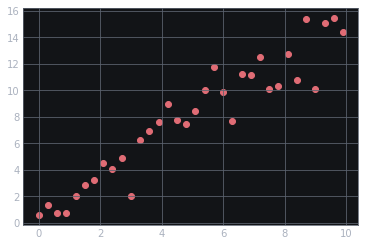

In [133]:
plt.scatter(X, y)

### Split data

Regression is a supervised task, and since we are interested in its performance on unseen data, we split our data into two parts:

1. a training set that the learning algorithm uses to fit the model
2. a test set to evaluate the generalization performance of the model

The ``train_test_split`` function from the ``model_selection`` module does that for us -- we will use it to split a dataset into 75% training data and 25% test data.

<img width="50%" src='https://github.com/fordanic/cmiv-ai-course/blob/master/notebooks/figures/train_test_split_matrix.png?raw=1'/>


In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((25,), (9,))

### Train model

This is deciding the architecture of our model. Our assumption is that the relationship between input and output is linear. So we constrain our model to be linear.

In [135]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train[:,np.newaxis], y_train)

LinearRegression()

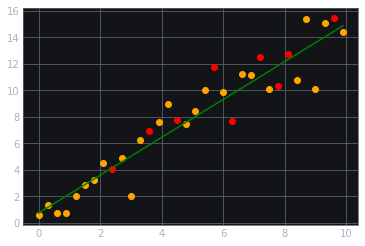

In [136]:
plt.plot(X_train, y_train, 'o', c='orange')
plt.plot(X_test, y_test, 'o', c='r' )
plt.plot(X, regressor.predict(X[:, np.newaxis]), c='g')

## Multidimensional input

We can use the exact same procedure as about if the input data has more then one dimension.

In [137]:
from sklearn.datasets import load_linnerud
dataset = load_linnerud(as_frame=True)

In [138]:
dataset.frame.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


### Predict the number of situps

We can try to predict the number of situps performed by a person based on their Weight, Waist and Pulse.

In [183]:
X = dataset.target
y = dataset.data['Situps']

In [184]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((15, 3), (5, 3))

In [185]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [186]:
def to_df(X, y, regressor):
    return pd.DataFrame(data = {'Weight': X.Weight, 'Waist':X.Waist, 'Pulse': X.Pulse, 'Ground Truth': y, 'Prediction':regressor.predict(X)})

In [187]:
to_df(X_test, y_test, regressor)

,Weight,Waist,Pulse,Ground Truth,Prediction
0,191.0,36.0,50.0,162.0,131.415084
17,157.0,32.0,52.0,230.0,181.803707
15,202.0,37.0,62.0,210.0,107.077872
1,189.0,37.0,52.0,110.0,118.862430
8,176.0,31.0,74.0,200.0,169.161937


In [188]:
to_df(X, y, regressor)

,Weight,Waist,Pulse,Ground Truth,Prediction
0,191.0,36.0,50.0,162.0,131.415084
1,189.0,37.0,52.0,110.0,118.862430
2,193.0,38.0,58.0,101.0,101.421952
3,162.0,35.0,62.0,105.0,138.170416
4,189.0,35.0,46.0,155.0,146.629151
5,182.0,36.0,56.0,101.0,127.998369
6,211.0,38.0,56.0,101.0,99.298339
7,167.0,34.0,60.0,125.0,150.070566
8,176.0,31.0,74.0,200.0,169.161937
9,154.0,33.0,56.0,251.0,167.677146


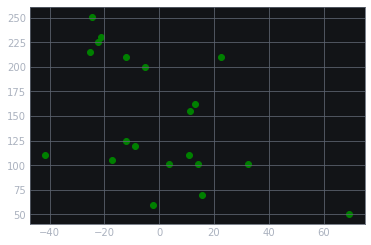

In [195]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
x_pca = pca.fit_transform(X)
plt.scatter(x_pca[:, 0], y, c='g')

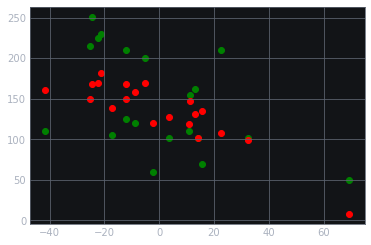

In [196]:
plt.scatter(x_pca[:, 0], y, c='g')
plt.scatter(x_pca[:, 0], regressor.predict(X), c='r')

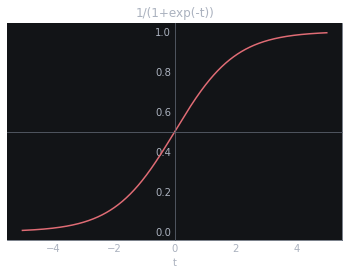

In [206]:
t = np.arange(-5, 5, 1/100)
ft = 1/(1+np.exp(-t))
fig, ax = plt.subplots()
ax.plot(t, ft)
ax.set_title('1/(1+exp(-t))')
ax.set_xlabel('t')
ax.spines['left'].set_position('center')
ax.spines['top'].set_position('center')
ax.grid(False)
plt.show()

## Logistic regression

We will try to classify the green and orange points using Logistic regression.

In [164]:
A = np.random.uniform(0, 1, size=(100, 2))
green = A[np.where(A[:, 1] < A[:, 0]), :][0]
orange = A[np.where(A[:, 1] >= A[:, 0]), :][0]

green = green + np.random.normal(0, 0.1, size=green.shape)
orange = orange + np.random.normal(0, 0.1, size=orange.shape)

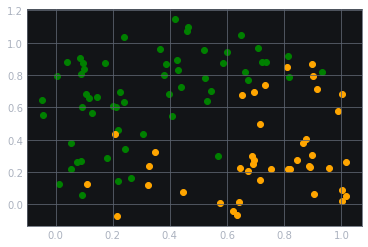

In [165]:
plt.scatter(green[:, 1], green[:, 0], c='green')
plt.scatter(orange[:, 1], orange[:, 0], c='orange')

In [166]:
X = np.concatenate([green, orange])
y = np.concatenate([[0]*green.shape[0], [1]*orange.shape[0]])

### Data split

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((75, 2), (25, 2))

### Train model

Here we set the architecture with the assumtion that the points can be separated linearly.

In [168]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

Lets calculate the decision boundary (this assumes that c0 != 0)

In [174]:
t = np.linspace(-0.3, 1.3, 100)
k = 0
m = 0
c1 = classifier.coef_[0][1]
c0 = classifier.coef_[0][0]
if c0 != 0:
    k = -c1/c0
    m = -classifier.intercept_ / c0
decision_boundary = k*t + m

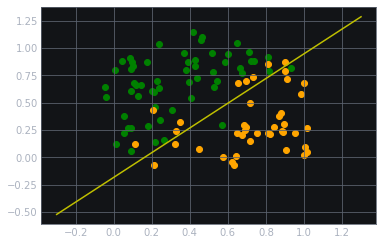

In [175]:
plt.scatter(green[:, 1], green[:, 0], c='green')
plt.scatter(orange[:, 1], orange[:, 0], c='orange')
plt.plot(t, decision_boundary, c='y')

We can also calculate a score for the model. This is the average number of correct predictions. Note that this should be performed on the test set.

In [173]:
classifier.score(X_test, y_test)

0.84